In [1]:
%reset -f

# Variables: iteration n, original height, velocity, and time y(0), v(0), t(0), gravity acceleration g, time step dt
# Bounce Counter, Bounce Limiter, and Coefficient of Restitution C
# Upwards is positive
# Download this code and run in a notebook interface (jupter notebook, visual studio code, google colab, etc.) to view the animation

n = 0
h, v, t = [1], [0], [0]
maxH = 1
g = -9.81
dt = 0.0001
bounceCount = 0
bounceLimit = 50
C = 0.8

while bounceCount < bounceLimit:
    
    # Kinematics Equations
    h.append(h[n] + v[n]*dt + 1/2*g*dt**2)
    v.append(v[n] + g*dt)
    t.append(t[n] + dt)
    
    # Bounce & Break Check
    if h[n+1] < 0 and v[n+1] < 0:
        v[n+1] = -C*v[n]
        bounceCount += 1
        
    # Max Height
    if h[n+1] > maxH:
        maxH = h[n+1]
        
    n += 1
    
print(f"Time: {t[-1]}")

Time: 4.038000000003928


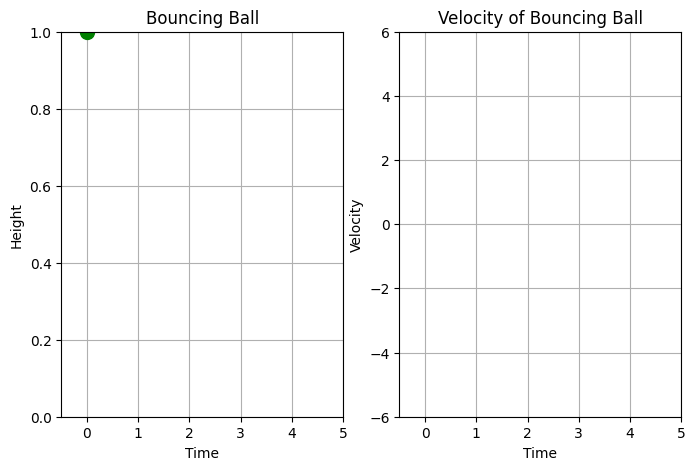

In [2]:
# Now we animate
import matplotlib.pyplot as plt
from matplotlib import animation
import math
import numpy as np
from IPython.display import HTML

# Create a figure and set the subplot
fig = plt.figure(figsize=(8,5))

ax1 = plt.subplot(1,2,1)
ax1.set_xlim((-0.5, math.ceil(t[-1])))            
ax1.set_ylim((0, math.ceil(maxH)))
ax1.set_xlabel('Time')
ax1.set_ylabel('Height')
ax1.grid()

ax2 = plt.subplot(1,2,2)
ax2.set_xlim((-0.5, math.ceil(t[-1])))            
ax2.set_ylim(-6, 6)
ax2.set_xlabel('Time')
ax2.set_ylabel('Velocity')
ax2.grid()

# Create the object that will be animated
txt_title1 = ax1.set_title('Bouncing Ball')
txt_title2 = ax2.set_title('Velocity of Bouncing Ball')
trace, = ax1.plot([], [], 'b', lw=5, label='Position')
vel, = ax2.plot([], [], 'r', lw = 3, label='Velocity')
ball, = ax1.plot([], [], 'g.', ms=20)

# Define function to draw a frame
def drawFrame(n):
    x = np.arange(0, (int(n*100)+1))
    hf = np.array(h)[x]
    vf = np.array(v)[x]
    trace.set_data(x*dt,hf)
    vel.set_data(x*dt,vf)
    ball.set_data(0, hf[-1])
    return(trace, vel, ball)

# Animate
anim = animation.FuncAnimation(fig, drawFrame, frames = int(n/100), interval=10)
HTML(anim.to_html5_video())